In [1]:
import PION_read as PION
import data_manipulation as data
import results_plot as plot
import results_plot_modified as plot2
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%load_ext autoreload
%autoreload 2 

In [2]:
name1 = 'calc_IR'
name2 = 'calc_noIR'

In [12]:
hden_PION_IR, xi_PION_IR, temp_PION_IR = PION.PION_read(name1)
hden_PION_noIR, xi_PION_noIR, temp_PION_noIR = PION.PION_read(name2)

xi_lin_PION = xi_PION_IR[0:8]
hden_lin_PION = data.linspace(0, 15, 1)

temp_hden_PION = np.array_split(list(temp_PION_IR), len(hden_lin_PION))
temp_xi_PION =  PION.temp_xi_PION(xi_lin_PION, temp_hden_PION)

temp_hden_PION_noIR = np.array_split(list(temp_PION_noIR), len(hden_lin_PION))
temp_xi_PION_noIR =  PION.temp_xi_PION(xi_lin_PION, temp_hden_PION_noIR)

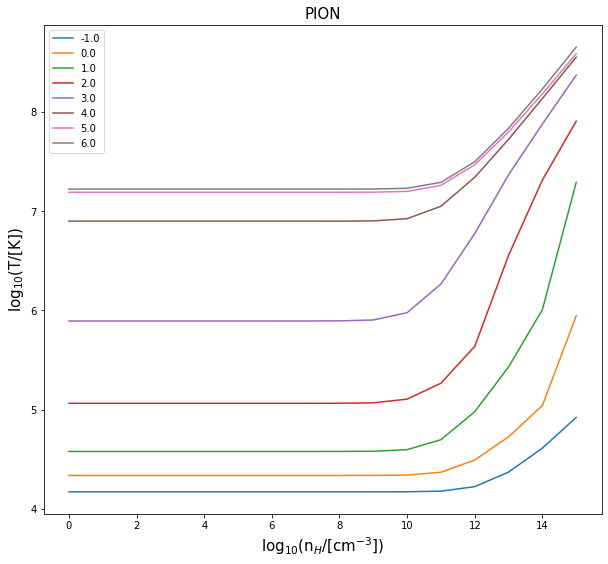

In [4]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("PION", fontsize=15)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=15)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=15)
for i in range(len(temp_xi_PION)):
    plt.plot(hden_lin_PION, np.log10(temp_xi_PION[i]), label=str(xi_lin_PION[i]))
plt.legend()

In [6]:
with open('Mrk509_arrays/avg_temp_2darr.npy', 'rb') as f:
    avg_temp_2darr = np.load(f)
    avg_temp_2darr_med = np.load(f)
    avg_temp_2darr_noIR = np.load(f)

with open('Mrk509_arrays/avg_temp_final.npy', 'rb') as f:
    avg_temp_split_all = np.load(f)
    avg_temp_split_med = np.load(f)
    avg_temp_split_noIR = np.load(f)
    
with open('Mrk509_arrays/transition.npy', 'rb') as f:
    n_transition_all = np.load(f)
    n_transition_med = np.load(f)
    n_transition_noIR = np.load(f)
    n_transition_stacked = np.load(f)
    te_transition_all = np.load(f)
    te_transition_med = np.load(f)
    te_transition_noIR = np.load(f)
    Te_transition_stacked = np.load(f)
    
xi_stepsize = 0.2
hden_stepsize = 0.1
xi = data.logspace(-1, 6, xi_stepsize)
hden = data.logspace(-1, 15, hden_stepsize)

xi_lin = data.linspace(-1, 6, xi_stepsize)
hden_lin = data.linspace(-1, 15, hden_stepsize)

xi_split = np.array_split(xi_lin, 4)
name_index  = {0:'full IR', 1:'intermediate IR', 2:'no IR'}

avg_temp_split_stacked = np.stack((avg_temp_split_all, avg_temp_split_med, avg_temp_split_noIR), axis=1)

In [7]:
def T_hden(avg_temp_split_stacked, temp_xi_PION):
    fig, ax = plt.subplots(figsize=(10, 9))
    plt.title("Cloudy vs PION", fontsize=18)
    plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=18)
    plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)
    ax.tick_params(axis='x', labelsize= 18) 
    ax.tick_params(axis='y', labelsize= 18) 

    i_arr = np.array([])
    colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_stacked)))
    i = 0
    while i <= len(xi_lin):
        row = avg_temp_split_stacked[i][0]
        (index,) = np.where(row != 1e-30)
        if len(index) == len(row):
            plt.plot(
                hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i]
           , label=str(xi_lin[i]))

        else:
            (i_1e30,) = np.where(row == 1e-30)
            end = i_1e30[0]
            plt.plot(
                #den_lin[index], np.log10(row)[0:end], color=colors[i-5]
                hden_lin[10:end], np.log10(row)[10:end], color=colors[i]
               , label=str(xi_lin[i]))    
        i += 5

    colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_xi_PION)))
    for i in range(len(temp_xi_PION)):
        plt.plot(hden_lin_PION, np.log10(temp_xi_PION[i]), label=str(xi_lin_PION[i]), linestyle=':', color=colors[i])
    plt.legend()
    return ax 

<AxesSubplot:title={'center':'Cloudy vs PION'}, xlabel='log$_{10}$(n$_H$/[cm$^{-3}$])', ylabel='log$_{10}$(T/[K])'>

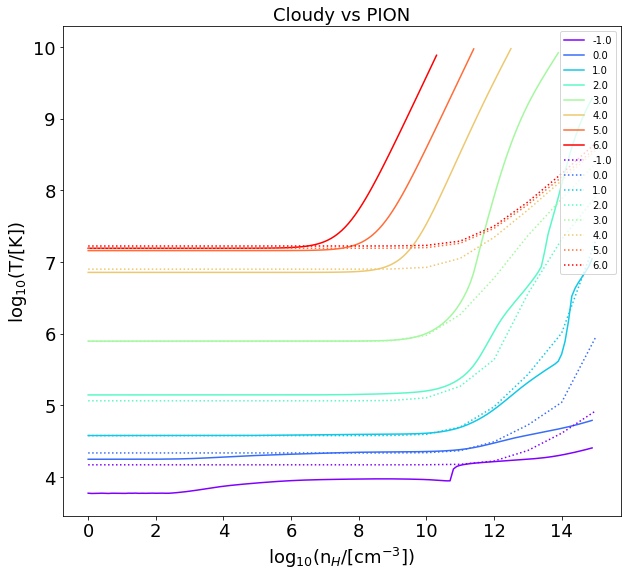

In [8]:
T_hden(avg_temp_split_stacked, temp_xi_PION)

In [9]:
def T_xi(avg_temp_2darr, temp_hden_PION):
    fig, ax = plt.subplots(figsize=(10, 9))
    plt.title(
        "Mrk509 IR",
        fontsize=18,
    )
    ax.tick_params(axis='x', labelsize= 18) 
    ax.tick_params(axis='y', labelsize= 18) 
    plt.xlabel('log($\\xi$/[erg cm s$^{-1}$])', fontsize=18)
    plt.ylabel(r'log($T_{avg} $/[K])', fontsize=18)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_2darr)))

    i = 10 # index 10 corresponds to hden = 0 (skips -[1~0) )
    while i <= len(hden):
        row = np.array(avg_temp_2darr[i])
        (index,) = np.where(row != 1e-30)
        if len(index) == len(row):  # == 1e-30 does NOT exist
            plt.plot(xi_lin, np.log10(row), color=colors[i], label=str(hden_lin[i]))
            #, label="n_h=10^" + str(hden_lin[i]) + ' (all)')
        else:
            (i_1e30,) = np.where(row == 1e-30)
            end = i_1e30[0]
            plt.plot(
                xi_lin[0:end],
                np.log10(row)[0:end],
                color=colors[i], label=str(hden_lin[i]),
                #label="n_h=10^" + str(hden_lin[i]) + ' (all)',
            ) 
        i += 10  


    colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_hden_PION)))
    for i in range(len(temp_hden_PION)):
        plt.plot(xi_lin_PION, np.log10(temp_hden_PION[i]), label=str(hden_lin_PION[i]), color=colors[i], linestyle=':')

    plt.legend()
    
    return ax

<AxesSubplot:title={'center':'Mrk509 IR'}, xlabel='log($\\xi$/[erg cm s$^{-1}$])', ylabel='log($T_{avg} $/[K])'>

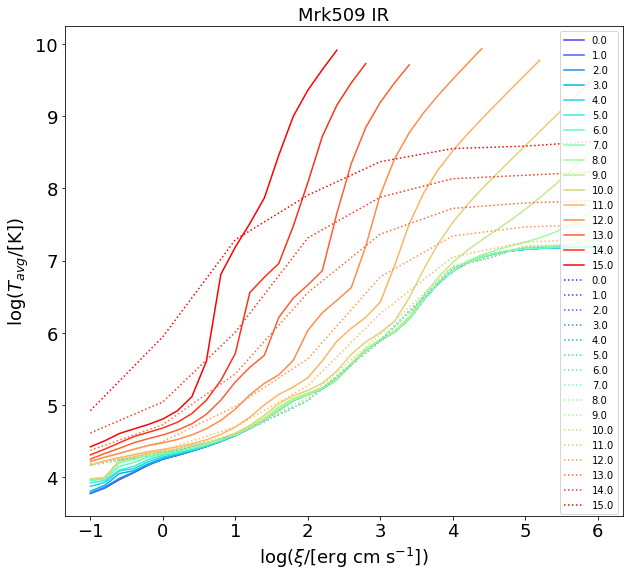

In [10]:
T_xi(avg_temp_2darr, temp_hden_PION)

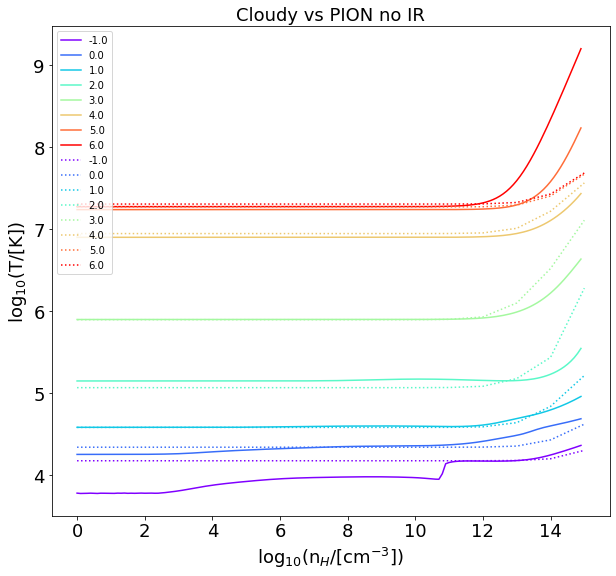

In [15]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Cloudy vs PION no IR", fontsize=18)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 

i_arr = np.array([])
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_stacked)))
i = 0
while i <= len(xi_lin):
    row = avg_temp_split_stacked[i][2]
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i]
       , label=str(xi_lin[i]))

    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            #den_lin[index], np.log10(row)[0:end], color=colors[i-5]
            hden_lin[10:end], np.log10(row)[10:end], color=colors[i]
           , label=str(xi_lin[i]))    
    i += 5
    
    
colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_xi_PION)))
for i in range(len(temp_xi_PION)):
    plt.plot(hden_lin_PION, np.log10(temp_xi_PION_noIR[i]), label=str(xi_lin_PION[i]), linestyle=':', color=colors[i])
plt.legend()

<AxesSubplot:title={'center':'Mrk509 IR'}, xlabel='log($\\xi$/[erg cm s$^{-1}$])', ylabel='log($T_{avg} $/[K])'>

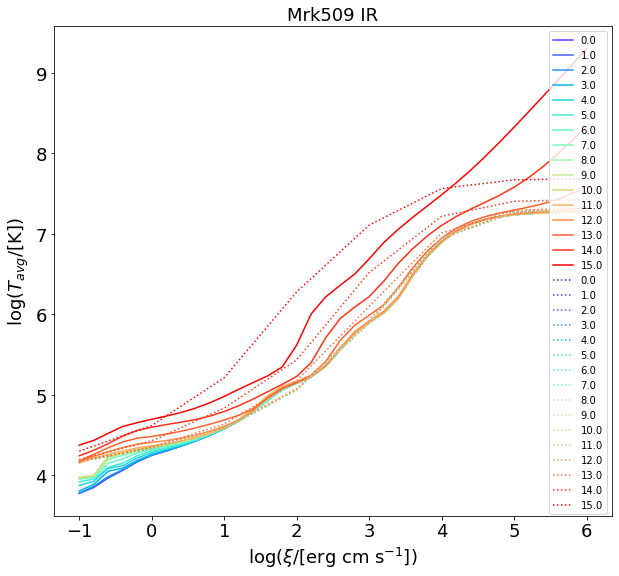

In [16]:
T_xi(avg_temp_2darr_noIR, temp_hden_PION_noIR)